# Chapter 10. 포아송 분포와 포아송 회귀분석
## 포아송 분포

<div style="text-align:center">
$ P(X = n) = \frac{{e^{-\lambda} \lambda^n}}{{n!}}$
</div>

여기서,
- ( $X$ )는 이산 확률 변수,
- ( $n$ )는 관심 있는 사건의 발생 횟수,
- ( $lambda$)는 사건이 발생하는 평균 횟수(단위 시간 또는 단위 공간)입니다.


## 포아송 회귀

- 포아송 회귀분석은 종속 변수가 포아송 분포를 따르고 독립 변수와 선형 관계를 가정하는 회귀분석 기법입니다.    
- 주로 사건의 발생 횟수를 예측하는데 사용됩니다. 종속 변수가 이산형이고, 예측하려는 값이 양의 정수인 경우에 유용합니다.    
- 이러한 분석을 수행할 때는 포아송 분포의 특성을 고려하여 모델을 구성하고 파라미터를 추정합니다.

### 분석 준비

In [1]:
# 숫자 계산에 사용되는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리는 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계 모델을 추정하는 라이브러리(경고가 발생할 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 소수점 자릿수 지정
%precision 3
# 그래프를 Jupyter Notebook 내에 표시하기 위한 설정
%matplotlib inline


## Problem Sample

어느 과자 가게에는 하루에 평균 3개의 홈런볼을 판매한다고 한다. 이 때, 하루에 두 개 이상의 홈런볼이 팔릴 확률은?

### Solution
과자 가게에서 하루에 두 개 이상의 홈런볼이 팔리는 경우는 $2$개 + $3$개 + $3$개 + ⋯ + ∞개의 경우를 모두 고려해야 합니다. 따라서 확률의 총 합은 $1$이라는 것을 감안하여, $1$에서 홈런볼이 $0$개 + $1$개인 경우의 확률을 빼준 값으로 두 개 이상 팔리는 확률을 계산합니다.

<div style="text-align:center">
$ P(n \geq 2) = 1 - \sum_{i=0} Pr(n = i) = 1 - (e^{-3} \times \frac{3^0}{0!} + e^{-3} \times \frac{3^1}{1!}) = 1 - (0.0498 + 0.1494) = 0.8008 $
</div>

In [21]:
import pandas as pd
import numpy as np

# 데이터 개수
n = 30

# 온도 생성 (20부터 30까지의 정수)
temperature = np.random.randint(1, 10, size=n)  # 20부터 30까지의 범위에서 랜덤으로 30개의 정수 생성

# 홈런볼 개수 생성 (홈런볼 개수가 지수 함수 형태를 가지도록 설정)
# 지수 함수 형태: y = a * exp(b * x)
a = 2  # 지수 함수의 상수
b = 0.1  # 지수 함수의 지수
homerunball_number = a * np.exp(b * temperature)  # 지수 함수 형태의 데이터 생성

# 데이터프레임 생성
data = {'homerunball_number': homerunball_number.astype(int), 'temperature': temperature}
df = pd.DataFrame(data)

# 데이터프레임 출력
print(df)


    homerunball_number  temperature
0                    2            3
1                    4            8
2                    2            2
3                    4            7
4                    4            8
5                    2            1
6                    2            4
7                    3            6
8                    3            6
9                    2            2
10                   2            1
11                   2            2
12                   2            4
13                   2            1
14                   4            7
15                   4            9
16                   2            1
17                   2            2
18                   3            5
19                   2            4
20                   2            2
21                   2            2
22                   4            7
23                   2            4
24                   2            3
25                   3            5
26                   2      

### 포아송 회귀

In [22]:
# 모델화
mod_pois = smf.glm("homerunball_number ~ temperature", df, 
                   family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     homerunball_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42.641
Date:                Wed, 06 Mar 2024   Deviance:                       1.0676
Time:                        20:41:55   Pearson chi2:                     1.06
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1799
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4253      0.253      1.679      0.093      -0.071       0.922
temperature     0.1170      0.048      2.458      0.014       0.024       0.210
===============================================================================
"""


### AIC에 의한 모델 선택

In [23]:
# Null 모델
mod_pois_null = smf.glm(
    "homerunball_number ~ 1", data=df, 
    family=sm.families.Poisson()).fit()

In [24]:
# AIC 비교
print("Null 모델    :", mod_pois_null.aic.round(3))
print("변수 포함 모델:", mod_pois.aic.round(3))

Null 모델    : 93.232
변수 포함 모델: 89.282


### 회귀 곡선 시각화

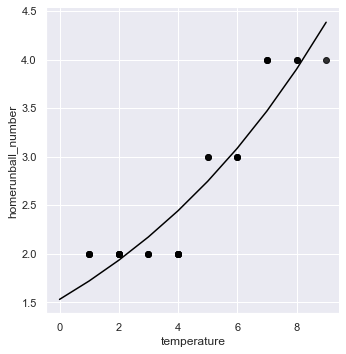

In [26]:
# 그림화

# 예측값 생성
x_plot = np.arange(0, 10
                  )
pred = mod_pois.predict(
    pd.DataFrame({"temperature": x_plot}))

# 회귀선을 포함하지 않는 lmplot
sns.lmplot(y="homerunball_number", x="temperature", 
           data=df, fit_reg=False,
           scatter_kws={"color":"black"})
# 회귀곡선을 덧그리기
plt.plot(x_plot, pred, color="black")


### 회귀 계수 해석

In [20]:
# 기온이 1도일 때의 판매 개수의 기대값
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

# 기온이 2도일 때의 판매 개수의 기대값
exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

# 기온이 1도에서 1도 올라갈 때, 판매 개수는 몇 배로 증가하는가
pred_2 / pred_1


0    1.10645
dtype: float64

In [14]:
np.exp(mod_pois.params["temperature"])

1.007669508713823